# Final Report

## Introduction

While not the most dangerous, alcohol is one of the most popular drugs in the world. Its consumption is not only popularized but normalized in modern society, regardless of any negative effects it may have. Many mental factors, such as impulsiveness and neuroticism, can affect how often one consumes alcohol. Furthermore, minimum legal ages fail to stop children and young teens from consuming alcohol. The question we aimed to answer in this project is “How can we predict the frequency of alcohol consumption based on certain aspects of an individual’s personality?” The dataset we are using to answer this question is a quantified drug consumption dataset. The dataset contains information about 1885 unique individuals. Each entry contains 12 attributes such as personality measurements, age, ethnicity, and etc; all of which are quantified and standardized. In addition, the dataset contains information regarding these individuals’ use of 18 drugs, ranging from chocolate to heroin, and one fictitious drug (semeron) to filter out false claims. Each value in the drug columns reflects the recency of an individual’s use of a certain drug, ranging from “Never Used” to “Used in Last Day.”

The dataset contains 32 columns. Each column corresponds to a specific attribute for each participant. The values in all columns were originally categorical but have been quantified to real numbers in the dataset. The level of consumption, however, for each drug is categorical and contains the following classes:

- CL0: Never used
- CL1: Used over a decade ago
- CL2: Used in last decade
- CL3: Used in last year
- CL4: Used in last month
- CL5: Used in last week
- CL6: Used in last day

Alongside the legal and illegal drugs in the dataset, there is a fictitious drug called Semeron which was used in the survey to identiy over-claimers. Here is information regarding all the columns:

- ID 
- Age (18-65+)
- Gender
- Education (level of education)
- Country (country of residence)
- Ethnicity (ethnicity)
- Nscore (measurement of neuroticism)
    + 12 to 60 (actual)
    + -3.46436 to 3.27393 (quantified)
- Escore (measurement of extraversion) 
    + 16 to 59 (actual)
    + -3.27393 to 3.27393 (quantified)
- Oscore (openness to experience)
    + 24 to 60 (actual)
    + -3.27393 to 2.90161 (quantified)
- Ascore (measurement of agreeableness)
    + 12 to 60 (actual)
    + -3.46436 to 3.46436 (quantified)
- Cscore (measurement of conscientiousness)
    + 17 to 59 (actual)
    + -3.46436 to 3.46436 (quantified)
- IScore (measurement of impulsiveness)
    + no actual values were provided
    + -2.55524 to 2.90161 (quantified)
- SS (measurement of sensation seeking)
    + no actual values were provided
    + -2.07848 to 1.92173 (quantified)
- Alcohol (level alcohol consumption)
- Amphetamines (level of amphetamines consumption)
- AmylNitrate (level of amyl nitrite consumption)
- Benzodiazepine (level of benzodiazepine consumption)
- Caffeine (level of caffeine consumption)
- Cannabis (level of cannabis consumption)
- Chocolate (level of chocolate consumption)
- Cocaine (level of cocaine consumption)
- Crack (level of crack consumption)
- Ecstasy (level of ecstasy consumption)
- Heroin (level of heroin consumption)
- Ketamine (level of ketamine consumption)
- LegalHighs (level of legal highs consumption) 
- LSD (level of LSD consumption)
- Methadone (level of methadone consumption) 
- Mushrooms (level of magic mushrooms consumption) 
- Nicotine (level of nicotine consumption)
- Semeron (level of fictitious drug Semeron consumption) 
- VSA (level of volatile substance abuse) 

## Methods and Results

### Overview:

In order to perform our analysis, we took the following steps: 

1. **Reading and Wrangling:** We read the data from its original source online, assigned relevant names to the unnamed columns, removed variables we deemed irrelevant to our analysis, and filtered out over-claiming observations
2. **Splitting:** We split our data into training and testing sets to perform our analysis
3. **Choosing Predictors:** We combined forward selection, predictor distribution, and external research to choose the three predictors we thought fit our analysis best
4. **Building and Tuning:** We built and tuned our k-nn classifier using our created recipe and 5-fold cross-validation
5. **Classification:** We used the classifier on the testing set to perform our analysis
6. **Results and Analysis:** We visualized the results and analyzed what it meant

### Loading Libraries

In [1]:
library(tidyverse)
library(testthat)
library(digest)
library(repr)
library(tidymodels)
library(GGally)
library(forcats)
library(RColorBrewer)
library(ggplot2)
library(knitr)
options(repr.matrix.max.rows = 7) # limits the outputs of data frames to 7 rows (or observations)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘testthat’


The following object is masked from ‘package:dplyr’:

    matches


The following object is masked from ‘package:purrr’:

    is_null


The following objects are masked from ‘package:readr’:

    edition_get, local_edition


The following object is masked from ‘package:tidyr’:

    matches


── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0  

### Reading the Data
We read the drugs consumption quantified dataset directly from the URL and saved it to a dataframe called "drugs_data". Since the columns in the dataset have no headings, we set `col_names` to `FALSE`.

In [2]:
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00373/drug_consumption.data"
drugs_data <- read_csv(url, col_names = FALSE)
drugs_data

Rows: 1885 Columns: 32
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (19): X14, X15, X16, X17, X18, X19, X20, X21, X22, X23, X24, X25, X26, X...
dbl (13): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,⋯,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,⋯,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,⋯,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,⋯,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,⋯,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,⋯,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,⋯,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0
1888,-0.95197,-0.48246,-0.61113,0.21128,-0.31685,-0.46725,2.12700,1.65653,1.11406,⋯,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL6,CL0,CL2


### Wrangling and Cleaning
- According to the website containing the dataset, it contains no missing values, and so it is unnecessary to check for them.
- We renamed the columns to names that corresponded to the information they contain.
- Each row in the data set corresponds to a single participant (observation), each column to a single variable (attribute) and each cell to a single value. Thus, our dataset is in tidy format.
- We removed every variable we deemed unnecessary for our analysis. This includes all other drugs other than alcohol and the fake drug Semeron, and all identifiers other than age.
- Since the purpose of the `Semeron` column is to detect over-claimers, in order to accurately perform our analysis, we had to filter out all observations that have claimed to ever use it (observations with a value other than `CL0` in the `Semeron` column.
- There are a total of 7 different classes in `Alcohol` that are ordered from `CL0` to `CL6` which might affect the accuracy of our classifier negatively. Therefore, we are going to collapse the classes from `CL0` to `CL4` to `low_use` and the classes `CL5` and `CL6` to `high_use`.
- We used `mutate` and `as_factor` functions to ensure that our response variable `Alcohol` is treated as factor which is neccesary for our classficiation model.

In [3]:
colnames(drugs_data) <- c("ID", "Age", "Gender", "Education", "Country", "Ethnicity", "NScore", "EScore", "OScore", "AScore", 
                          "CScore", "IScore", "SS", "Alcohol", "Amphetamines", "AmylNitrate", "Benzodiazepine", "Caffeine", "Cannabis", "Chocolate", "Cocaine",
                          "Crack", "Ecstacy", "Heroin", "LegalHighs", "LSD", "Methadone", "Mushrooms", "Nicotine", "Semeron", "VSA")

alcohol_data <- select(drugs_data, Age, NScore , EScore, OScore, AScore,
                                IScore, CScore, SS, Semeron, Alcohol)

alcohol_data_filtered <- alcohol_data |>
                         filter(Semeron == "CL0") |>
                         select(-Semeron)

alcohol_data_filtered$Alcohol[alcohol_data_filtered$Alcohol == "CL6"] <- "high_use"
alcohol_data_filtered$Alcohol[alcohol_data_filtered$Alcohol == "CL5"] <- "high_use"
alcohol_data_filtered$Alcohol[alcohol_data_filtered$Alcohol == "CL4"] <- "low_use"
alcohol_data_filtered$Alcohol[alcohol_data_filtered$Alcohol == "CL3"] <- "low_use"
alcohol_data_filtered$Alcohol[alcohol_data_filtered$Alcohol == "CL2"] <- "low_use"
alcohol_data_filtered$Alcohol[alcohol_data_filtered$Alcohol == "CL1"] <- "low_use"
alcohol_data_filtered$Alcohol[alcohol_data_filtered$Alcohol == "CL0"] <- "low_use"

alcohol_clean <- alcohol_data_filtered |>
                 mutate(Alcohol = as_factor(Alcohol))
alcohol_clean

Age,NScore,EScore,OScore,AScore,IScore,CScore,SS,Alcohol
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.49788,-0.46725,0.80523,-0.84732,-1.62090,-1.37983,-1.01450,0.40148,high_use
0.49788,-1.32828,1.93886,-0.84732,-0.30172,0.19268,1.63088,-0.52593,high_use
1.82213,-2.05048,-1.50796,-1.55521,-1.07533,-0.71126,1.13407,-0.52593,high_use
1.82213,1.37297,-0.15487,-0.17779,-1.92595,-0.71126,-1.51840,-0.21575,high_use
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
-0.95197,-0.79151,0.00332,2.44904,0.76096,0.88113,-1.51840,1.92173,high_use
2.59171,2.12700,-0.15487,2.44904,0.94156,-0.21712,-0.65253,0.07987,high_use
-0.95197,-1.19430,1.74091,1.88511,0.76096,0.88113,-1.13788,1.92173,high_use


### Exploratory Data Analysis
After cleaning the dataset, we're left with 428 observations. From this point on, we will be using 75% of our data set and we will use the rest 25% only to test the accuracy of our classifier. Thus, we split our dataset into training and testing sets using the `initial_split` function. We used the `set.seed()` function for reproducible results, as `initial_split()` splits the dataframe randomly

In [4]:
set.seed(69)
alcohol_split <- initial_split(alcohol_clean, prop = 0.75, strata = Alcohol)
alcohol_train <- training(alcohol_split)
alcohol_test <- testing(alcohol_split)

#### Dataset Summary
We sumarized our dataset in two ways:
- A table that reports the number of observations for each class in `Alcohol`
- A table that reports the mean of all personality measurements grouped by the `Alcohol` variable.

In [5]:
alcohol_count <- group_by(alcohol_train, Alcohol) |>
                 summarize(n = n())
alcohol_count

Alcohol,n
<fct>,<int>
high_use,204
low_use,116


- Using the `group_by`, `summarize`, and `n()` functions, we obtained the count of observations for both classes in `Alcohol` in the above table.
- The number of observations among both the classes are slightly imbalanced as the number of observations for `high_use` consumption are more than those for `low_use` consumption.

<!-- - The number of observations are distributed unevenly across all levels of alcohol consumption which means that our data set is not balanced. The maximum number of observations are in `CL5` (used in last week) while the mininum number of observations are in `CL1` (used over a decade ago).  -->

In [6]:
alcohol_means <- alcohol_train |>
                 group_by(Alcohol) |>
                 summarize(NScore_Mean = mean(NScore),
                           EScore_Mean = mean(EScore),
                           OScore_Mean = mean(OScore),
                           AScore_Mean = mean(AScore),
                           IScore_Mean = mean(IScore),
                           CScore_Mean = mean(CScore))
alcohol_means

Alcohol,NScore_Mean,EScore_Mean,OScore_Mean,AScore_Mean,IScore_Mean,CScore_Mean
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
high_use,-0.1992394,0.14083162,-0.2961758,0.3143100,-0.3016477,0.3521869
low_use,-0.1861555,-0.08777802,-0.2939090,0.1220522,-0.4236891,0.1961747


- With the use of `group_by`, `summarize` and `mean()` functions, we were able to obtain the means of all potential predictor variables for both classes in `Alcohol` in the above table.
- There is not a lot of difference between these values which indicates that our variables require further analysis.

#### Visual Representation
- We displayed the distribution of the potential predictors using histograms since we are dealing with numerical data.
- First, we needed to modify our data so that we could compare the distributions of all potential predictors next to each other using `facet_wrap`. To do this, we used the `pivot_longer` function so that all the potential predictors fit under one column `predictors`, and their corresponding values under the column `values`.

Age,Alcohol,Potential_predictors,Values
<dbl>,<fct>,<chr>,<dbl>
0.49788,high_use,NScore,-0.46725
0.49788,high_use,EScore,0.80523
0.49788,high_use,OScore,-0.84732
0.49788,high_use,AScore,-1.62090
⋮,⋮,⋮,⋮
-0.95197,low_use,IScore,-0.21712
-0.95197,low_use,CScore,-0.78155
-0.95197,low_use,SS,0.40148


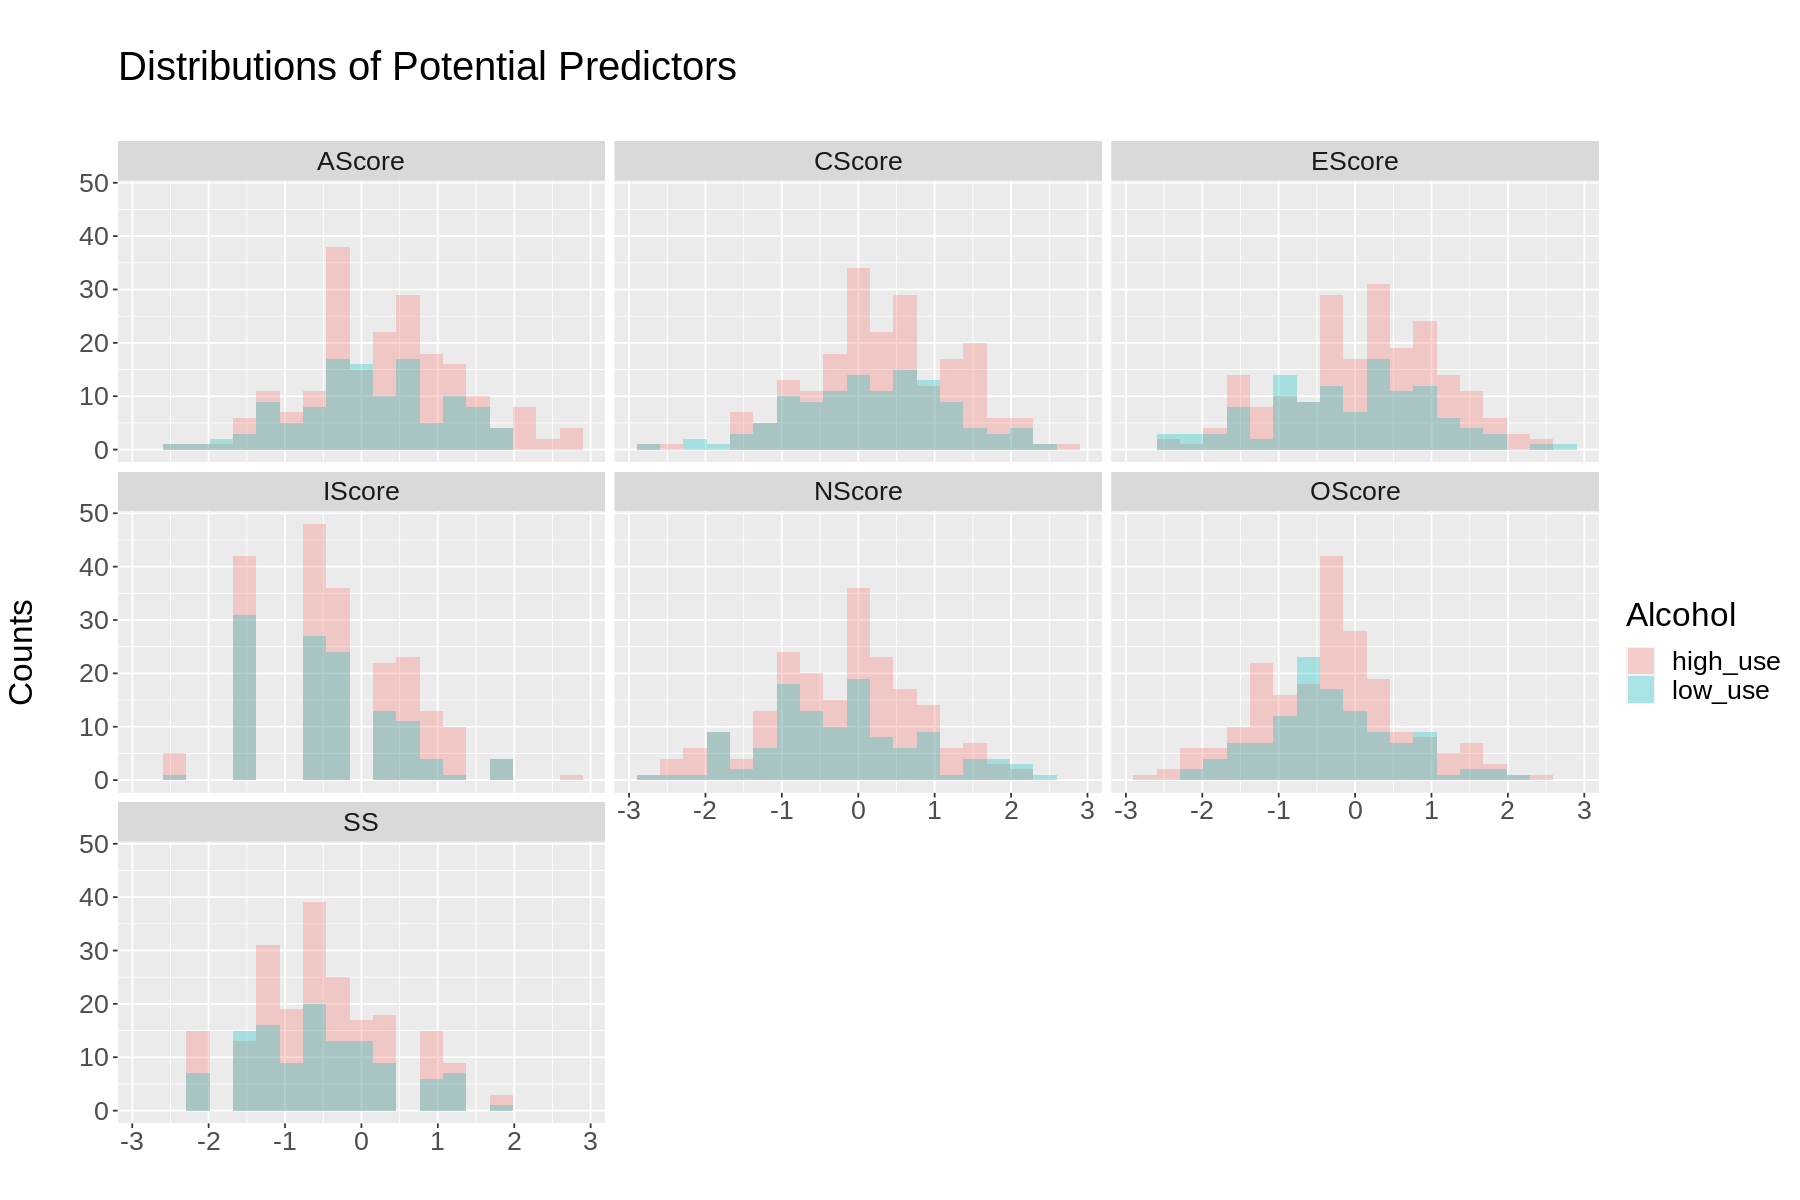

In [7]:
options(repr.plot.width = 15, repr.plot.height = 10)

alcohol_longer <- alcohol_train |> 
                pivot_longer(cols = NScore:SS,
                             names_to = "Potential_predictors",
                             values_to = "Values") 
alcohol_longer

alcohol_plot <- alcohol_longer |>
    ggplot(aes(x = Values, fill = Alcohol)) + 
    geom_histogram(position = 'identity', bins = 20, alpha = 0.3) +
    labs(x = "",
         y = "Counts\n",
         title = "\nDistributions of Potential Predictors\n") +
    facet_wrap(vars(Potential_predictors)) +
    theme(text = element_text(size = 20)) 
alcohol_plot

<!-- - Looking at the plots above, the distribution of IScore seems to be right-skewed which is a good indicator that it could be a good predictor variable.

- The plot of OScore seems to be roughly semetric and has one distinct peak around -0.3. This means that it may be beneficial to be chosen as one of our predictor variable.

- However, for the rest of the plots, there does not seem to be an observable pattern because there are many outliers -->
<!-- 
- Unfortunately, no pattern in the plots above can be seem as well, therefore, we will be needing further analysis by researching the individual predictors to figure out which directly correlates with Alcohol consumption the most. -->

- The distribution of the our two classes, high and low roughly follow the same pattern and the only difference is that the low are lower and the high are higher.

## Building the Classifier
<!-- - To build our classification model, we use  the training set, `alcohol_train` and test it on the testing set`alcohol_test`. -->
1. We defined our predictors and our target variable using the `recipe()` function. Scaling and centering are implemented within the recipe as well.
2. To build our classification model, we used the `nearest_neighbor()` function and set `neighbors = tune()` to the k-value with the highest accuracy.
3. We performed 5-fold cross-validation 
4. We created a workflow to combine the recipe, the model and apply the `tune_grid()` function for the cross validation. 
5. We used `collect_metrics()` to collect the accuracy for each value of k and plotted them against the neighbors to visually identify the most optimal k-value.

In [8]:
set.seed(6699)

alcohol_recipe <- recipe(Alcohol ~ IScore + SS + EScore, data = alcohol_train) |>
                  step_scale(all_predictors()) |> 
                  step_center(all_predictors())

alcohol_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |> 
    set_engine("kknn") |> 
    set_mode("classification")

alcohol_vfold <- vfold_cv(alcohol_train, v = 5, strata = Alcohol)

# testing k-values ranging from 1 to 50
gridvals <- tibble(neighbors = seq(1, 50))

alcohol_results <- workflow() |> 
    add_recipe(alcohol_recipe) |> 
    add_model(alcohol_spec) |> 
    tune_grid(resamples = alcohol_vfold, grid = gridvals) |> 
    collect_metrics() |> 
    filter(.metric == "accuracy")

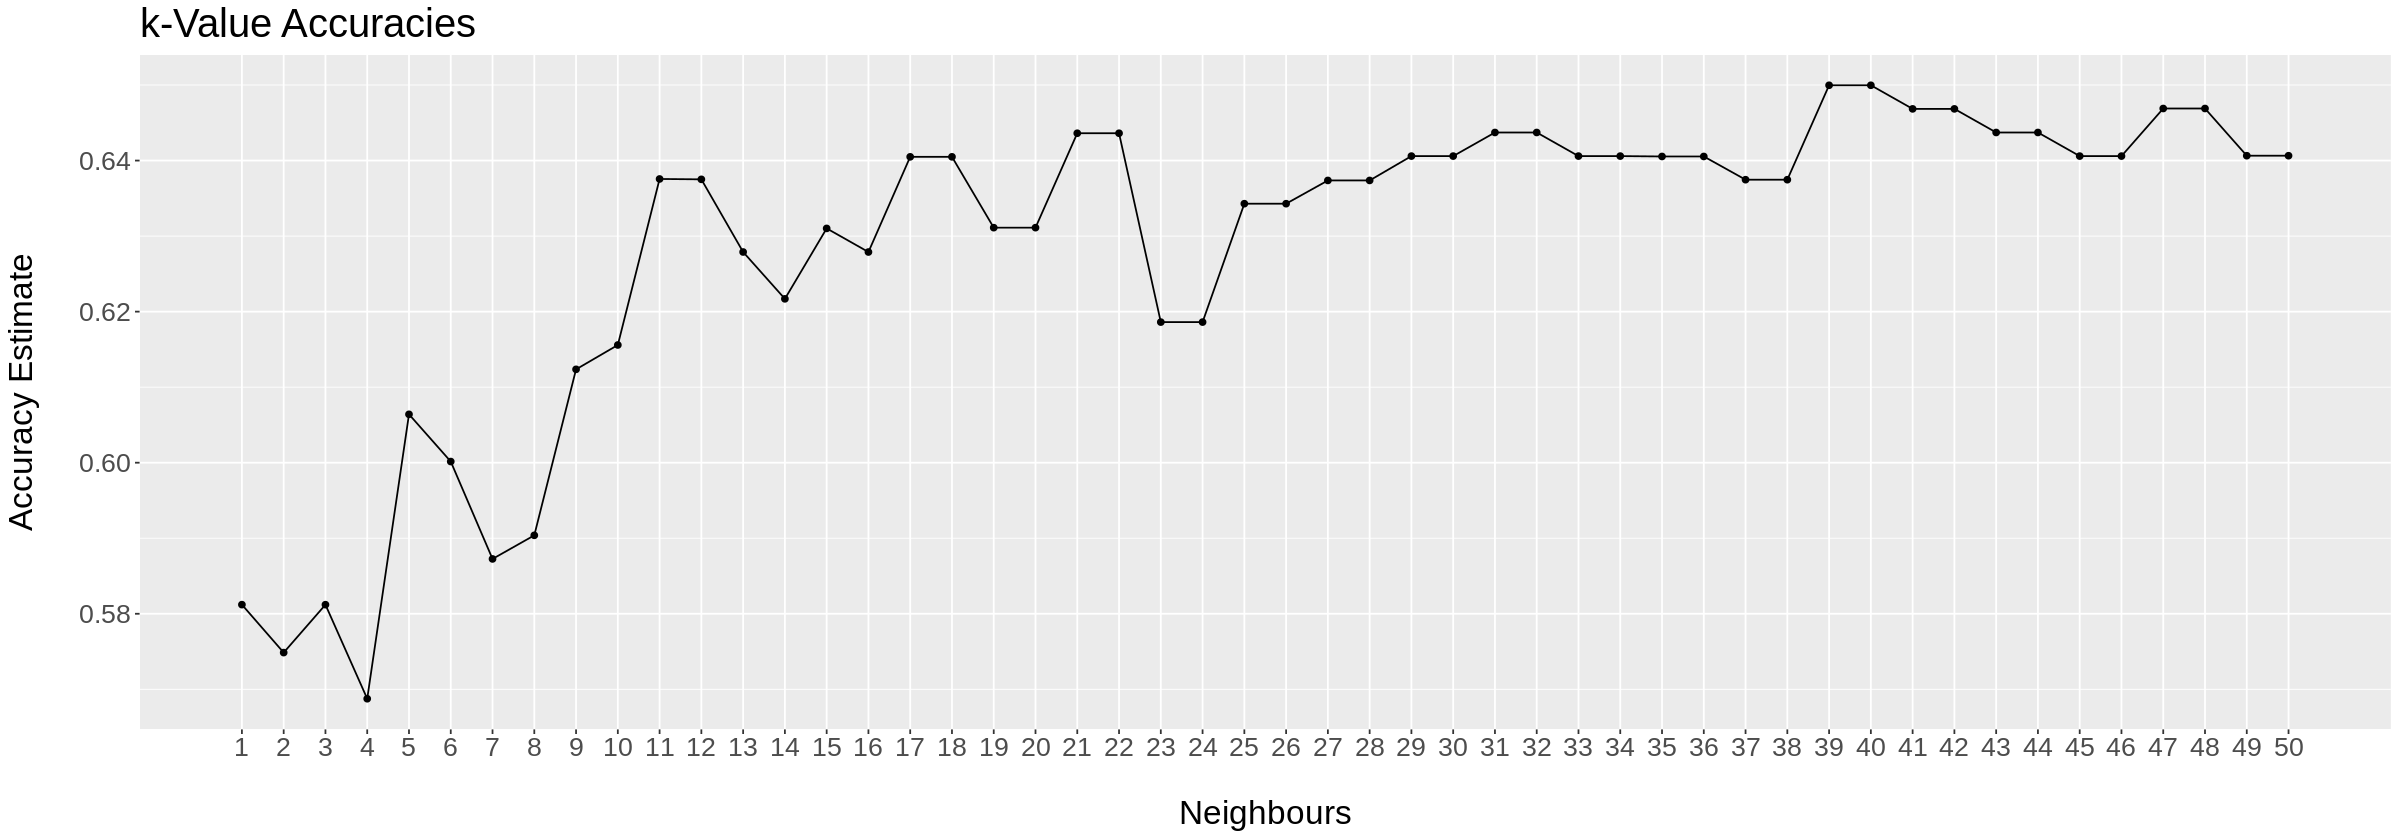

In [9]:
options(repr.plot.width = 20, repr.plot.height = 7)

accuracy_plot <- alcohol_results |> 
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    # geom_vline(xintercept = 36, colour = "blue") +
    # geom_point(aes(x = 36, y = ky), size = 4, colour = "red") +
    labs(x = "\nNeighbours",
         y = "Accuracy Estimate\n",
         title = "k-Value Accuracies") +
scale_x_continuous(limits = c(1, 50), breaks = seq(1, 50), minor_breaks = seq(1, 50, 1)) +
    theme(text = element_text(size = 20))

accuracy_plot

Looking at the plot, it's difficult to distinguish the exact k-value with the highest accuracy, so we created a table showing accuracies in descending order for each k-value.

In [10]:
top_k <- alcohol_results |>
         select(neighbors, mean) |>
         arrange(desc(mean))
top_k

neighbors,mean
<int>,<dbl>
39,0.6499649
40,0.6499649
47,0.6468895
48,0.6468895
⋮,⋮
3,0.5812057
2,0.5748626
4,0.5687538


Although the highest accuracy occurs when the number of neighbors is 36, looking at the plot above, the values around 36 slighly vary. However, when the number of neighbors is 48, the values around it are stable and have the same accuracy. As a result, **48** is the most optimal k-value.

In [11]:
knn_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 48) |> 
    set_engine("kknn") |> 
    set_mode("classification")

alcohol_fit <- workflow() |>
  add_recipe(alcohol_recipe) |>
  add_model(knn_best_spec) |>
  fit(data = alcohol_train)

### Results

In [12]:
alcohol_predictions <- predict(alcohol_fit, alcohol_test) |> 
    bind_cols(alcohol_test)

alcohol_predictions

alcohol_acc <- alcohol_predictions |> 
    metrics(truth = Alcohol, estimate = .pred_class) |> 
    select(.metric, .estimate) |> 
    head(1)

alcohol_acc

.pred_class,Age,NScore,EScore,OScore,AScore,IScore,CScore,SS,Alcohol
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
high_use,1.82213,1.37297,-0.15487,-0.17779,-1.92595,-0.71126,-1.51840,-0.21575,high_use
high_use,0.49788,-0.24649,-0.57545,-0.17779,-0.01729,-0.21712,-1.51840,-0.21575,high_use
high_use,-0.07854,-0.46725,0.47617,1.24033,0.94156,-1.37983,1.63088,-2.07848,high_use
high_use,1.82213,0.04257,-0.69509,-1.11902,-0.45321,-1.37983,-0.40581,-2.07848,low_use
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
high_use,-0.07854,1.23461,-0.80615,-0.84732,-1.07533,1.29221,-0.89891,1.92173,high_use
high_use,-0.95197,0.41667,-0.15487,1.43533,1.28610,0.52975,-0.65253,0.07987,low_use
high_use,-0.95197,-0.79151,0.00332,2.44904,0.76096,0.88113,-1.51840,1.92173,high_use


.metric,.estimate
<chr>,<dbl>
accuracy,0.6388889


The accuracy of our classifier turned out to be about 43%, which is not good. There are a number of possible explanations for this innacuracy.
1. Because we're limited by the power of our computers, we can only pick 3 predictors before the algorithm becomes too slow to use reliably. This means that we're only using three out of the seven possible predictors. Undoubtedly, the predictor would be more accurate if we were to use all of them, but we're unable to.
2. While the original dataset was extensive, we had to filter out over three quarters of the observations due their being over-claimants. Because we were only left with 428 observations after the filtering, the resulting algorithm is much less accurate than had it had access to more data.
3. An overwhelming majority of the observations had a consumption level of CL5 for alcohol. This can be explained due to the drug's popularity, but also caused the algorithm to overpredict CL5 in the data
4. The three predictors we chose have a strong positive relationship with alcohol consumption, i.e. a higher trait rating means more consumption. Had we chosen a balancec of positive and negatively related traits, it is possible the algorithm would have a higher accuracy

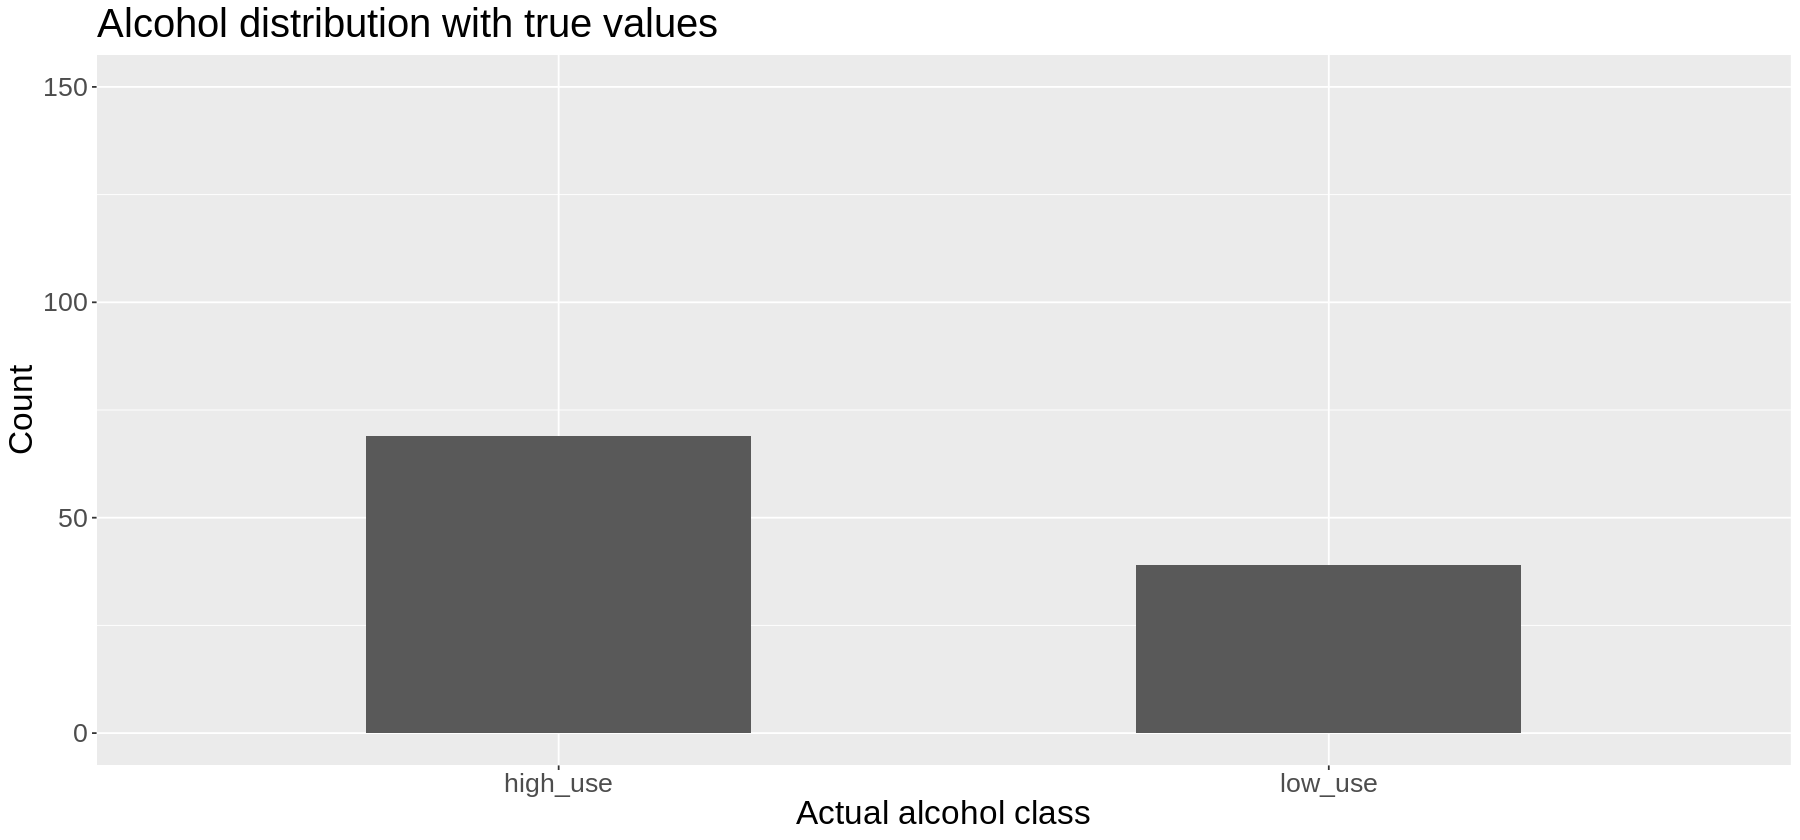

          Truth
Prediction high_use low_use
  high_use       69      39
  low_use         0       0

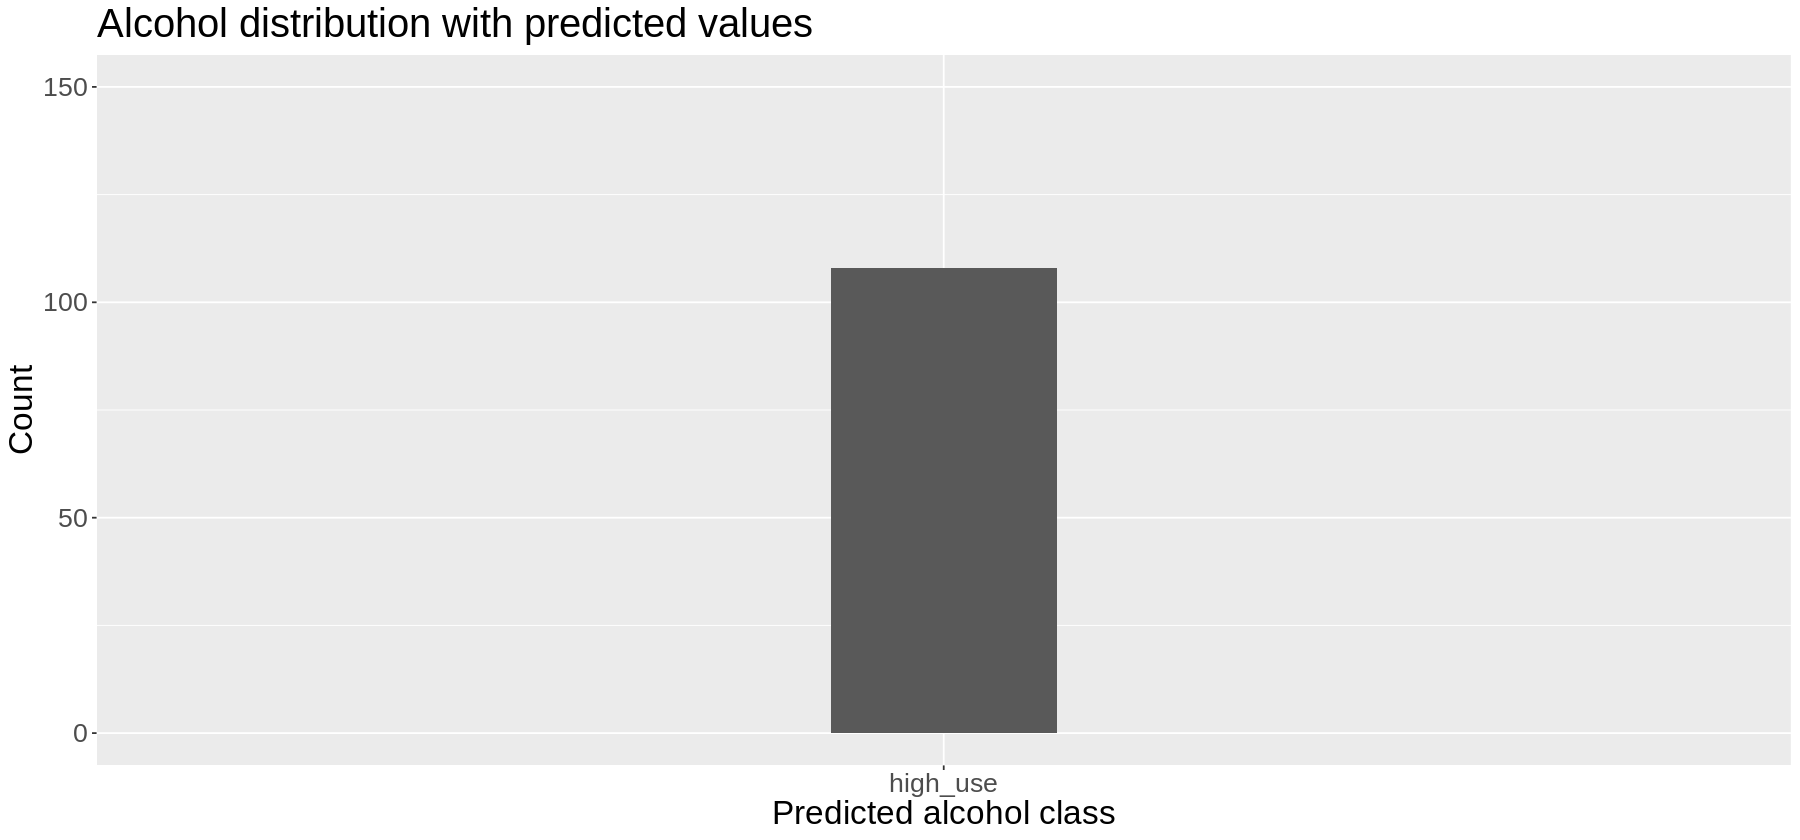

In [13]:
options(repr.plot.width = 15, repr.plot.height = 7)

result_plot_actual <- ggplot(alcohol_predictions, aes(x = Alcohol)) +
                        geom_bar(width = 0.5) +
                        labs(x = "Actual alcohol class",
                             y = "Count",
                             title = "Alcohol distribution with true values") +
                        ylim(0,150) +
                        theme(text = element_text(size = 20))

result_plot_pred <- ggplot(alcohol_predictions, aes(x = .pred_class)) +
                        geom_bar(width = 0.16) +
                        labs(x = "Predicted alcohol class",
                             y = "Count",
                             title = "Alcohol distribution with predicted values") +
                        ylim(0,150) +
                        theme(text = element_text(size = 20))

result_plot_actual
result_plot_pred

alcohol_cm <- alcohol_predictions %>% 
    conf_mat(truth = Alcohol, estimate = .pred_class)
alcohol_cm

## Discussion:

- We got rid of couple of variable which also included the consumption of other drugs which could be another factor that could affect the prediction of the response variable. 
- Another factor could be the imbalance in the nubmer of observations among the classes of Alcohol.
- Although the chosen variables have somewhat of a correlation between the target varible, the connections between them were not as strong as we hoped
- it seems like so far we chose predictor that may need lead to higher alcohol consumption maybe that's why we don't have predictions between CL0-CL4.

LUKE AND KIMMY GO VERY DEEP INTO THESE TOPICS PLZ !!!

ALL QUESTION WE NEED TO ASK
- can we ignore the tables and the plots and depend on research. (we tried creating them but have found no pattern)
- Are there main ideas enough to thoroughly explain why our classifier has low accuracy
- is IScore right skewed?
- how much info do we have to provide to state that our predictors are the most optimal choices
- how do we add labels?
- how to we make the plots side by side?
- should we oversample all non-CL5 classes?


In [15]:
set.seed(1)

alcohol_subset1 <- alcohol_train %>% select(Age, NScore, EScore, OScore, 
                                      AScore, IScore, CScore, Alcohol)

# (Age, Neuroticism, Extraversion, Openness_to_Experience, 
#                                       Agreeableness, Impulsiveness, Conscientiousness, Alcohol)

# (Age, Gender, Education, Country, Ethnicity, Neuroticism,
#                        Extraversion, Openness_to_Experience,
#                        Agreeableness, Impulsiveness, Conscientiousness, Alcohol)

names1 <- colnames(alcohol_subset1 %>% select(-Alcohol))

# create an empty tibble to store the results
accuracies <- tibble(size = integer(), model_string = character(), accuracy = numeric())

# create a model specification
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
     set_engine("kknn") %>%
     set_mode("classification")

# create a 5-fold cross-validation object
alcohol_vfold <- vfold_cv(alcohol_subset1, v = 5, strata = Alcohol)

# store the total number of predictors
n_total <- length(names1)

# stores selected predictors
selected <- c()

# for every size from 1 to the total number of predictors
for (i in 1:n_total) {
    # for every predictor still not added yet
    accs <- list()
    models <- list()
    for (j in 1:length(names1)) {
        # create a model string for this combination of predictors
        preds_new <- c(selected, names1[[j]])
        model_string <- paste("Alcohol", "~", paste(preds_new, collapse="+"))

        # create a recipe from the model string
        alcohol_recipe <- recipe(as.formula(model_string), data = alcohol_subset1) %>%
                          step_scale(all_predictors()) %>%
                          step_center(all_predictors())

        # tune the KNN classifier with these predictors, and collect the accuracy for the best K
        acc <- workflow() %>%
          add_recipe(alcohol_recipe) %>%
          add_model(knn_spec) %>%
          tune_grid(resamples = alcohol_vfold, grid = 10) %>%
          collect_metrics() %>%
          filter(.metric == "accuracy") %>%
          summarize(mx = max(mean))
        acc <- acc$mx %>% unlist()

        # add this result to the dataframe
        accs[[j]] <- acc
        models[[j]] <- model_string
    }
    jstar <- which.max(unlist(accs))
    accuracies <- accuracies %>% add_row(size = i, model_string = models[[jstar]], accuracy = accs[[jstar]])
    selected <- c(selected, names1[[jstar]])
    names1 <- names1[-jstar]
}
accuracies

size,model_string,accuracy
<int>,<chr>,<dbl>
1,Alcohol ~ OScore,0.6437149
2,Alcohol ~ OScore+EScore,0.6531364
3,Alcohol ~ OScore+EScore+NScore,0.6374618
4,Alcohol ~ OScore+EScore+NScore+AScore,0.6375145
5,Alcohol ~ OScore+EScore+NScore+AScore+IScore,0.6439087
6,Alcohol ~ OScore+EScore+NScore+AScore+IScore+Age,0.6373191
7,Alcohol ~ OScore+EScore+NScore+AScore+IScore+Age+CScore,0.6124092


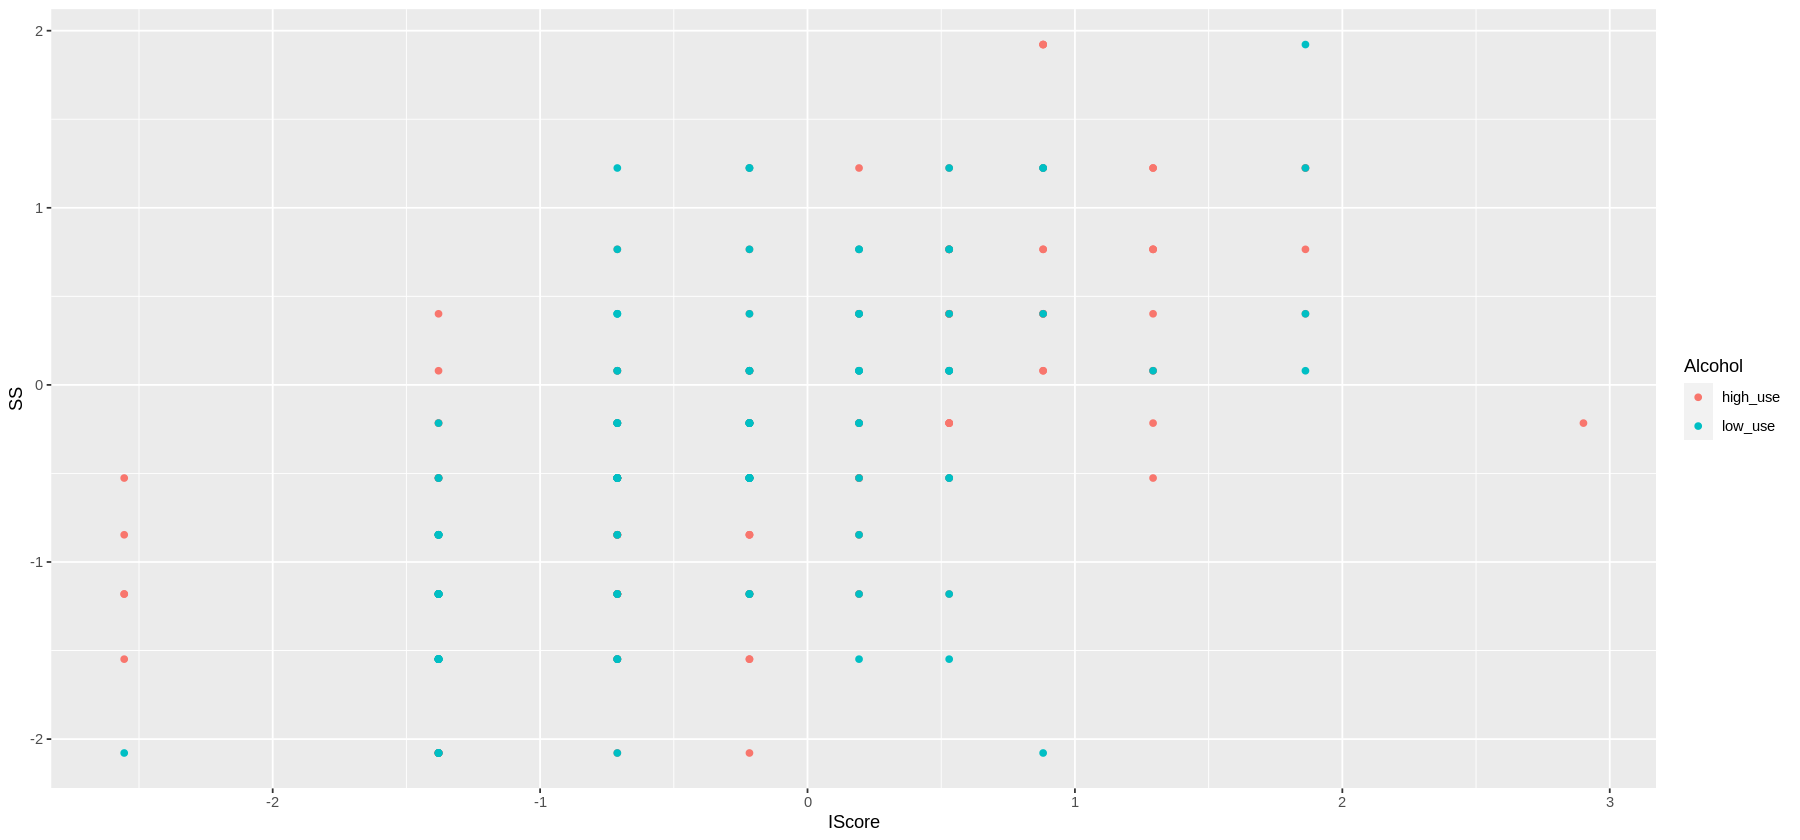

In [18]:
ggplot(alcohol_train, aes(x=IScore, y=SS, colour = Alcohol)) +
    geom_point()